<a href="https://colab.research.google.com/github/n-aguiar/Data_Science/blob/main/Natalia_Aguiar-Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
#importing libraries and programs
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
# defining alle the variables i am going to use
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): #plots the suplots for the "scantron"
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url): #displays the images from my slides
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url): #images in slides -> colaboratory
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [4]:
url = "https://docs.google.com/presentation/d/1POUI5xBwE7DECV3PvQyF3HyuIGfbibQ8ghtT5ijsGqM/edit#slide=id.g1a982e52b04_0_0" #getting my 50 images from google slides

displaying my images from slides

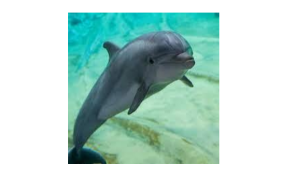

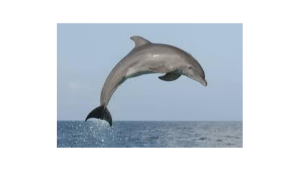

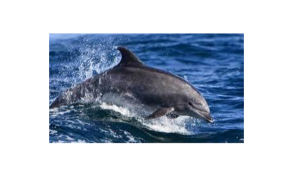

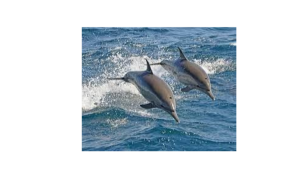

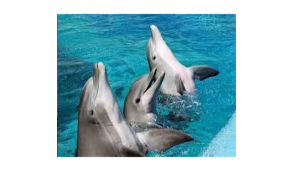

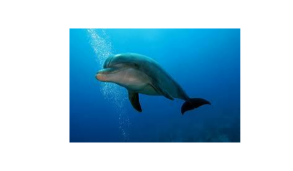

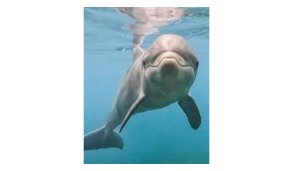

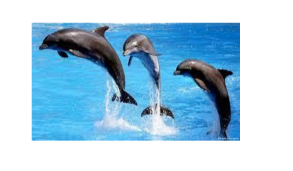

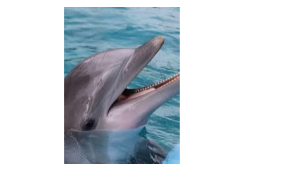

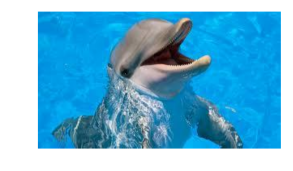

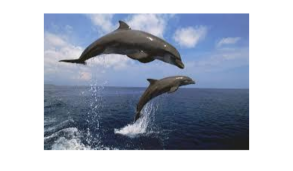

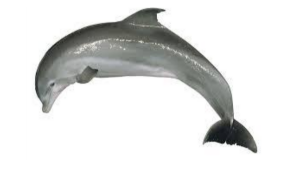

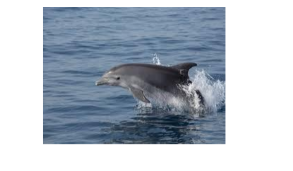

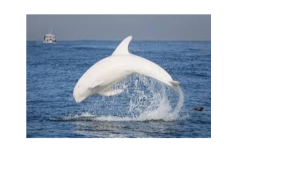

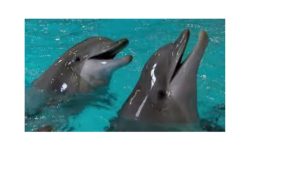

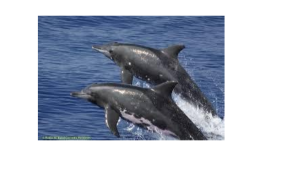

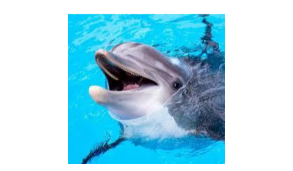

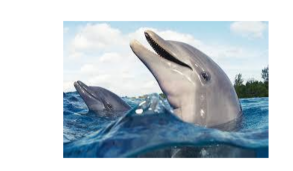

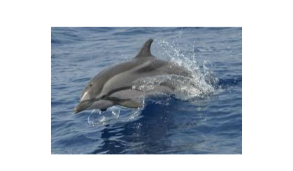

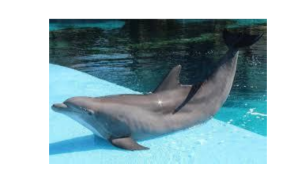

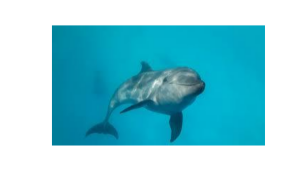

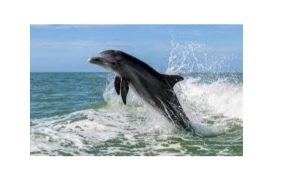

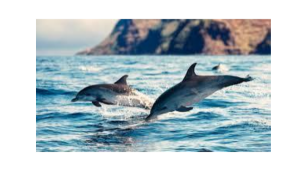

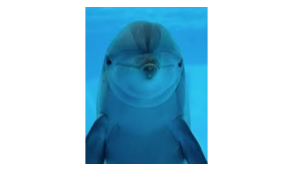

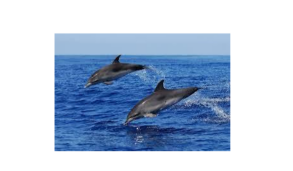

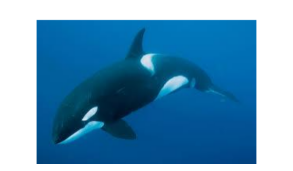

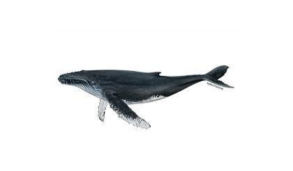

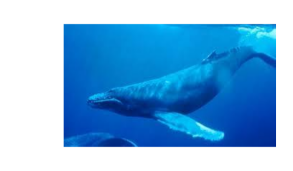

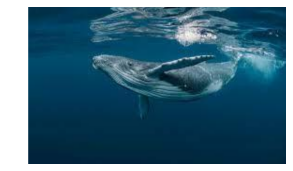

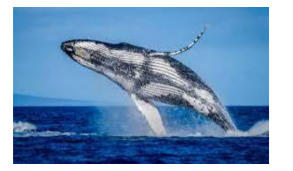

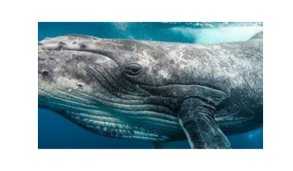

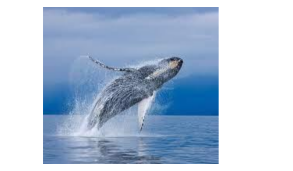

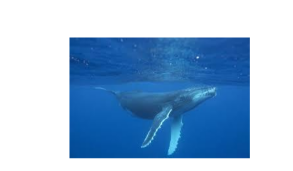

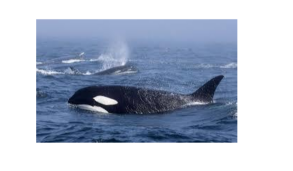

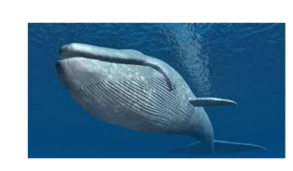

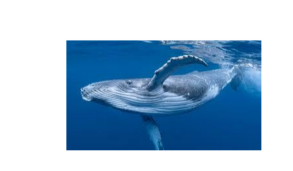

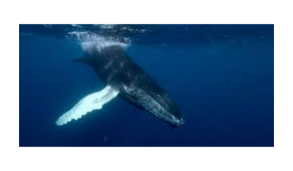

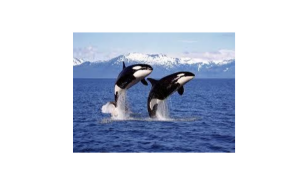

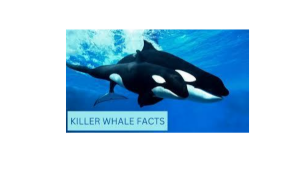

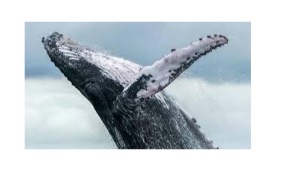

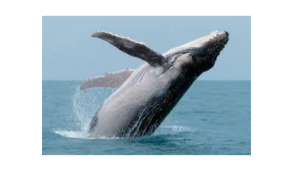

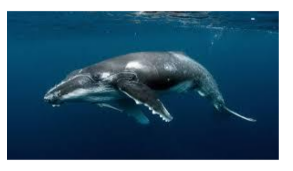

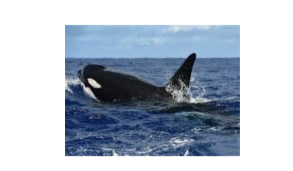

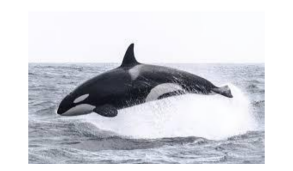

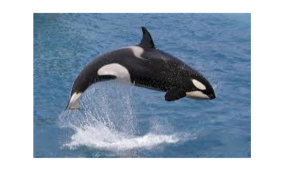

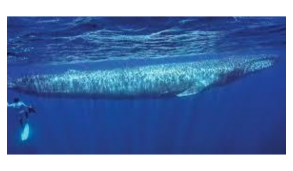

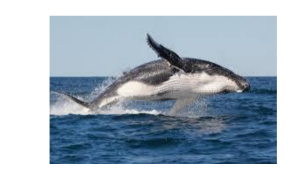

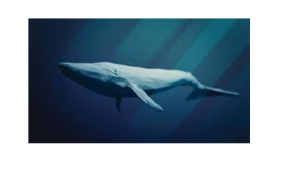

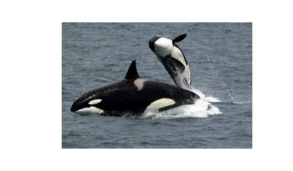

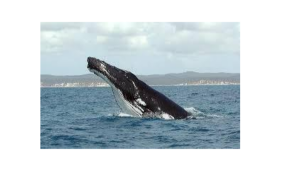

In [5]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [6]:
images.shape #how many images i brought in

torch.Size([50, 3, 224, 224])

In [7]:
model(images) #puts the images through models

tensor([[ 5.4982, -0.3210,  8.1734,  ...,  0.6067,  0.2703, -1.0626],
        [ 5.8290, -5.0525, 10.3992,  ..., -0.4469, -1.2798,  0.7231],
        [ 5.3568, -1.7542, 14.3751,  ..., -0.4786, -1.3331, -2.3738],
        ...,
        [ 1.6397, -0.2294, 10.4503,  ..., -1.5261,  1.2989,  2.0242],
        [ 1.8608, -7.3522, 12.3579,  ..., -7.3109, -3.3622,  0.5379],
        [ 3.4396, -7.3852, 15.1263,  ..., -3.9154, -4.1868, -3.2326]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images) #turned it into a list with 1,000 numbers to help it distignuish the 

In [9]:
y.shape

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [11]:
for i in list(guesses): #printing the possible guesses for the images placed
    print(labels[i])

dugong, Dugong dugon
mink
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
dugong, Dugong dugon
snorkel
albatross, mollymawk
great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
albatross, mollymawk
hammer
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
tiger shark, Galeocerdo cuvieri
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
tiger shark, Galeocerdo cuvieri
dugong, Dugong dugon
grey whale, gray whale, devilfish, Eschrich

In [12]:
Y = np.zeros(50,)
Y[25:] = 1 #setting an answer key for what is right

In [13]:
Y #showing what was correct

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy() 

In [15]:
X.shape #made the numbers into a feature vector

(50, 1000)

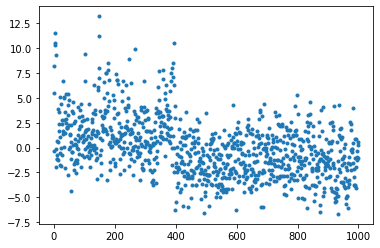

In [16]:
plt.plot(X[0],'.') #plots all the guesses it had based on the numbers from the image

In [17]:
X[0]

array([ 5.49820518e+00, -3.20960909e-01,  8.17335320e+00,  1.15525360e+01,
        1.03173637e+01,  1.04884949e+01,  9.34546089e+00, -1.39589787e-01,
       -1.91639400e+00, -1.19926310e+00, -7.00421929e-01, -1.19838083e+00,
        6.62212193e-01,  6.08843863e-01,  3.87736392e+00, -1.26382506e+00,
        1.66515887e+00,  3.58332396e+00,  2.40061450e+00, -5.74960589e-01,
        1.03381276e+00,  5.08120632e+00, -1.70702016e+00,  4.34077978e+00,
       -1.81823134e+00, -2.32748911e-02,  2.79587483e+00, -7.35302091e-01,
        2.33272958e+00,  6.74500418e+00,  1.61820185e+00,  1.35554409e+00,
        2.79368162e+00,  5.13707829e+00,  5.03114557e+00,  1.01182967e-01,
        3.55818129e+00, -2.07717896e+00,  1.51462257e+00,  5.36272049e+00,
        2.84304380e+00,  2.43446016e+00,  1.92424655e+00,  1.94115508e+00,
        2.10851431e+00, -2.73550558e+00,  3.28995895e+00,  5.38744688e+00,
        4.26338530e+00, -1.91315562e-01,  2.23043752e+00,  4.82778597e+00,
        1.24672866e+00,  

In [18]:
np.argmax(X[0]) #sorting the max value from the plot

149

In [19]:
labels[149] #sets the top label number from what number i got from np.argmax

'dugong, Dugong dugon'

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [21]:
for i in top_ten: #the correct answer should be in the top 10 atleast
    print(labels[i])

dugong, Dugong dugon
tiger shark, Galeocerdo cuvieri
sea lion
sturgeon
electric ray, crampfish, numbfish, torpedo
hammerhead, hammerhead shark
Mexican hairless
platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus
stingray
Great Dane


In [22]:
labels #guesses for the slide demo from class

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 35., 146., 250., 276., 165.,  76.,  30.,  13.,   6.,   3.]),
 array([-6.683608  , -4.6926126 , -2.7016168 , -0.71062124,  1.2803743 ,
         3.27137   ,  5.2623653 ,  7.253361  ,  9.244357  , 11.2353525 ,
        13.226348  ], dtype=float32),
 <a list of 10 Patch objects>)

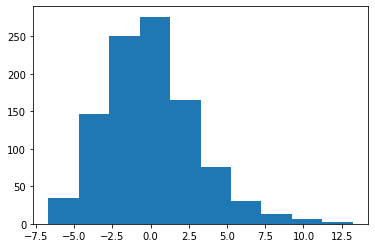

In [23]:
plt.hist(X[0]) #plotting the histogram of the images

In [24]:
X = GPU_data(X) #initializong variable
Y = GPU_data(Y) #initializing variable

In [25]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [26]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [28]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [30]:
X.shape

torch.Size([50, 1000])

In [31]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [32]:
def model(x,w):

    return x@w[0]

In [33]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [35]:
#the actual testing and training of the model
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots() #plots the loss and accurancy training


acc_train,▃▃▁▃▁▅▃▅▃▃▆▅▃█▇▇▃█▅▆▇▇▇▇▃▇▆▅▇▃▅▇▅▃▃▃▇▇█▃
loss,▆▆█▆█▅▆▅▆▆▃▅▆▁▂▂▆▁▅▃▂▂▂▂▆▂▃▅▂▆▅▂▅▆▆▆▂▂▁▆
acc_train,0.84375
loss,0.46951


<ipython-input-2-29e430b02da5>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

# Run data

**Run 1:** Wild Rain     
 loss= 0.3913          
 acc_train=0.9218

**Run 2:** Misunderstood Wood                     
  loss= 0.4695        
 acc_train= 0.8057

**Run 3:** Deft-Haze      
 loss= 0.4915       
 acc_train= 0.8214


**Best Run:** Wild Rain

**Worst Run:**
Deft Haze

**Average**                    
loss= 0.4507               
acc_train= 0.8496